<a href="https://colab.research.google.com/github/CameronLooney/Data-Science-Projects-Notebooks/blob/main/HandWriting_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### Read in data

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
data= pd.read_csv('/content/drive/MyDrive/Google Colab/Hand Writing/A_Z Handwritten Data.csv')


## Split data

In [4]:
X = data.drop('0',axis = 1)
y = data['0']

## Data Reshaping
(n_images, x_shape, y_shape,channels)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(train_x)

train_x = standard_scaler.transform(train_x)
test_x = standard_scaler.transform(test_x)

In [7]:
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

As our target has 26 unique values its obvious that its a one to one map so that 0 goes to A and 1 goes to B etc

### Letter Map

In [8]:
letter_map ={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [9]:
import seaborn as sns

[Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G'),
 Text(0, 0, 'H'),
 Text(0, 0, 'I'),
 Text(0, 0, 'J'),
 Text(0, 0, 'K'),
 Text(0, 0, 'L'),
 Text(0, 0, 'M'),
 Text(0, 0, 'N'),
 Text(0, 0, 'O'),
 Text(0, 0, 'P'),
 Text(0, 0, 'Q'),
 Text(0, 0, 'R'),
 Text(0, 0, 'S'),
 Text(0, 0, 'T'),
 Text(0, 0, 'U'),
 Text(0, 0, 'V'),
 Text(0, 0, 'W'),
 Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'Z')]

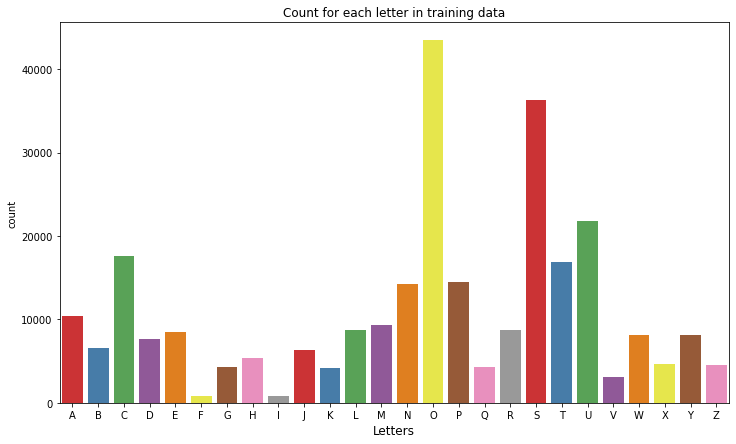

In [10]:
fig,ax=plt.subplots(figsize=(12,7))
letters= []
for i in letter_map.values():
    letters.append(i)
ax = sns.countplot(x=train_y,palette="Set1")
ax.set_xlabel("Letters",size=12)
ax.set_title("Count for each letter in training data")
ax.set_xticklabels(labels = letters)


### Shuffle data

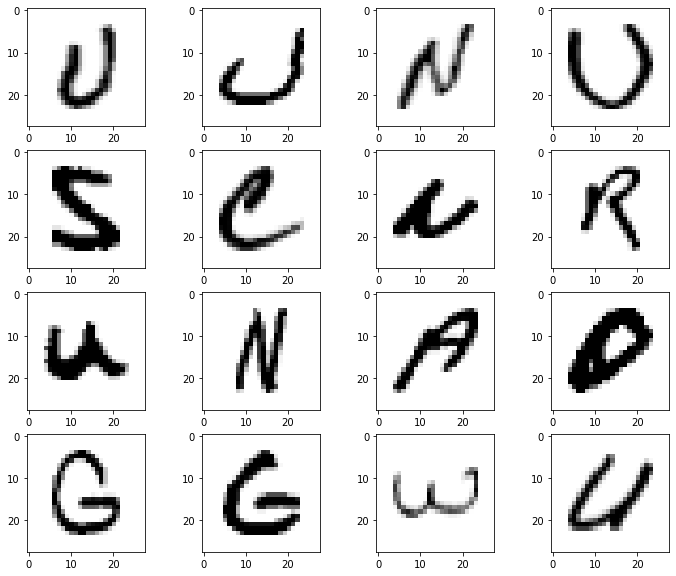

In [11]:

from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [10]:
X_train = train_x.reshape(train_x.shape[0], 28, 28, 1).astype('float32')
X_test = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')


y_train = np_utils.to_categorical(train_y)
y_test = np_utils.to_categorical(test_y)
print("Train data shape: ", X_train.shape)
print("Test data shape: ",X_test.shape)


Train data shape:  (279337, 28, 28, 1)
Test data shape:  (93113, 28, 28, 1)


In [11]:

import keras

In [12]:
model= Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(y.unique()), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])
  

Epoch 1/20
1397/1397 - 50s - loss: 0.2318 - accuracy: 0.9352 - val_loss: 0.1025 - val_accuracy: 0.9722
Epoch 2/20
1397/1397 - 6s - loss: 0.0880 - accuracy: 0.9753 - val_loss: 0.0704 - val_accuracy: 0.9814
Epoch 3/20
1397/1397 - 6s - loss: 0.0662 - accuracy: 0.9814 - val_loss: 0.0640 - val_accuracy: 0.9827
Epoch 4/20
1397/1397 - 6s - loss: 0.0529 - accuracy: 0.9845 - val_loss: 0.0560 - val_accuracy: 0.9860
Epoch 5/20
1397/1397 - 6s - loss: 0.0450 - accuracy: 0.9864 - val_loss: 0.0499 - val_accuracy: 0.9874
Epoch 6/20
1397/1397 - 6s - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0439 - val_accuracy: 0.9900
Epoch 7/20
1397/1397 - 6s - loss: 0.0320 - accuracy: 0.9900 - val_loss: 0.0450 - val_accuracy: 0.9895
Epoch 8/20
1397/1397 - 6s - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0432 - val_accuracy: 0.9904
Epoch 9/20
1397/1397 - 6s - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0441 - val_accuracy: 0.9902
Epoch 10/20
1397/1397 - 6s - loss: 0.0221 - accuracy: 0.9928 - val_loss: 0.0416 -

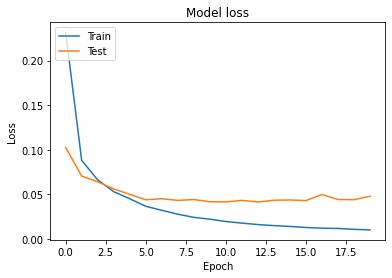

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
model.summary()
model.save(r'model_handwriting.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 26)                3354      
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

# Predictions on Test Data

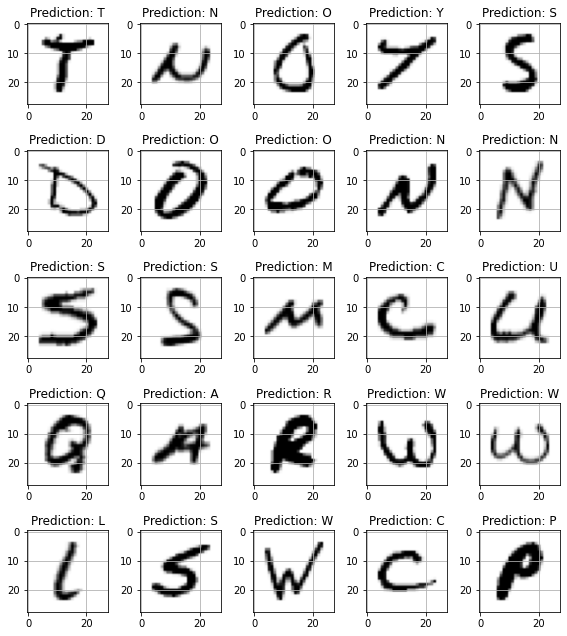

In [15]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = letter_map[np.argmax(y_test[i])]
    ax.set_title("Prediction: "+pred)
    fig.tight_layout() 
    ax.grid()